# Importing the data, performing summary statistics and visualizations, and creating our training and test sets

In [14]:
# Importing dependencies

import pandas as pd
from sklearn.model_selection import train_test_split

climate_df = pd.read_csv('../data/climate_change_dataset.csv') # Loading the dataset

climate_df.head() # Printing the first 5 rows

,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5
3,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7
4,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4


In [15]:
climate_df.info() # Rows x column length and checking for null values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         1000 non-null   int64  
 1   Country                      1000 non-null   object 
 2   Avg Temperature (°C)         1000 non-null   float64
 3   CO2 Emissions (Tons/Capita)  1000 non-null   float64
 4   Sea Level Rise (mm)          1000 non-null   float64
 5   Rainfall (mm)                1000 non-null   int64  
 6   Population                   1000 non-null   int64  
 7   Renewable Energy (%)         1000 non-null   float64
 8   Extreme Weather Events       1000 non-null   int64  
 9   Forest Area (%)              1000 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 78.3+ KB


In [16]:
# Generating summary statistics
summary_stats = climate_df.describe()
summary_stats.to_csv("../output/summary_statistics.csv", index=True)
summary_stats

,Year,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,2011.432000,19.883100,10.425800,3.009600,1738.761000,7.053830e+08,27.300500,7.291000,40.572000
std,7.147199,8.542897,5.614665,1.146081,708.976616,4.093910e+08,12.970808,4.422655,17.398998
min,2000.000000,5.000000,0.500000,1.000000,501.000000,3.660891e+06,5.100000,0.000000,10.100000
25%,2005.000000,12.175000,5.575000,2.000000,1098.750000,3.436242e+08,16.100000,3.000000,25.600000
50%,2012.000000,20.100000,10.700000,3.000000,1726.000000,7.131166e+08,27.150000,8.000000,41.150000
75%,2018.000000,27.225000,15.400000,4.000000,2362.500000,1.073868e+09,38.925000,11.000000,55.800000
max,2023.000000,34.900000,20.000000,5.000000,2999.000000,1.397016e+09,50.000000,14.000000,70.000000


In [17]:
climate_df = climate_df.drop(['Year', 'Country'], axis=1) # Dropping non-predictive columns

df = climate_df.rename(columns = {
    'Avg Temperature (°C)': 'avg_temperature', 
    'CO2 Emissions (Tons/Capita)': 'co2_emissions', 
    'Sea Level Rise (mm)': 'sea_level', 
    'Rainfall (mm)': 'rainfall', 
    'Population': 'population', 
    'Renewable Energy (%)': 'renewable_energy_pct', 
    'Extreme Weather Events': 'extreme_weather_events', 
    'Forest Area (%)': 'forest_area_pct'
}) # Renaming column for easier access


In [ ]:
# Saving the columns we are using

pd.DataFrame(df.columns, columns=['column_name']).to_csv("../output/column_names.csv", index=False)
df.columns

Index(['avg_temperature', 'co2_emissions', 'sea_level', 'rainfall',
       'population', 'renewable_energy_pct', 'extreme_weather_events',
       'forest_area_pct'],
      dtype='object')

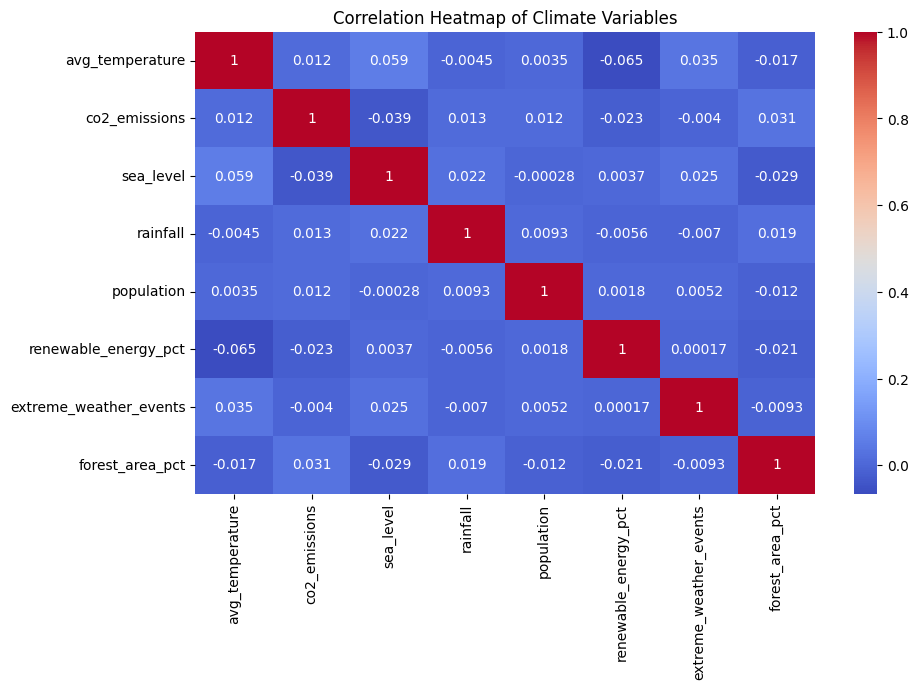

In [20]:
# Heatmap visualization of correlations between variables

# Importing dependencies for visualization

import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Climate Variables")
plt.savefig("../output/correlation_heatmap.png")
plt.show()


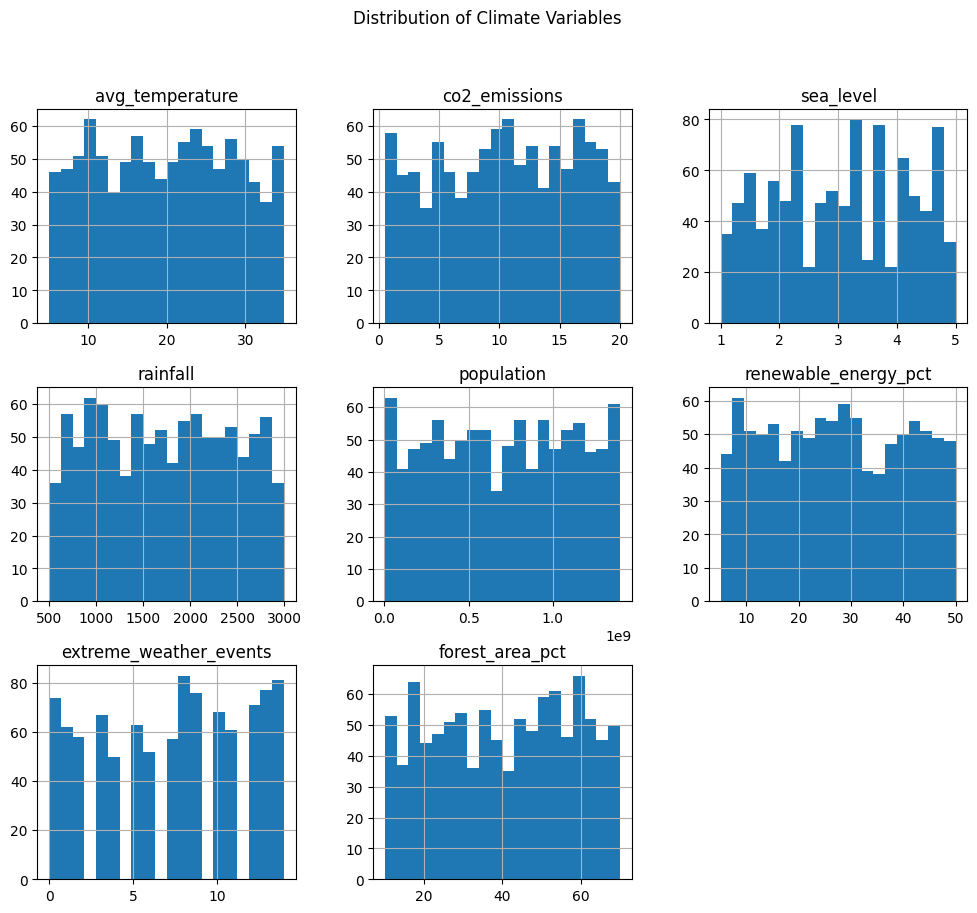

In [21]:
# Histogram visualization of variable distributions

df.hist(figsize=(12,10), bins=20)
plt.suptitle("Distribution of Climate Variables")
plt.savefig("../output/climate_variable_distributions.png")
plt.show()


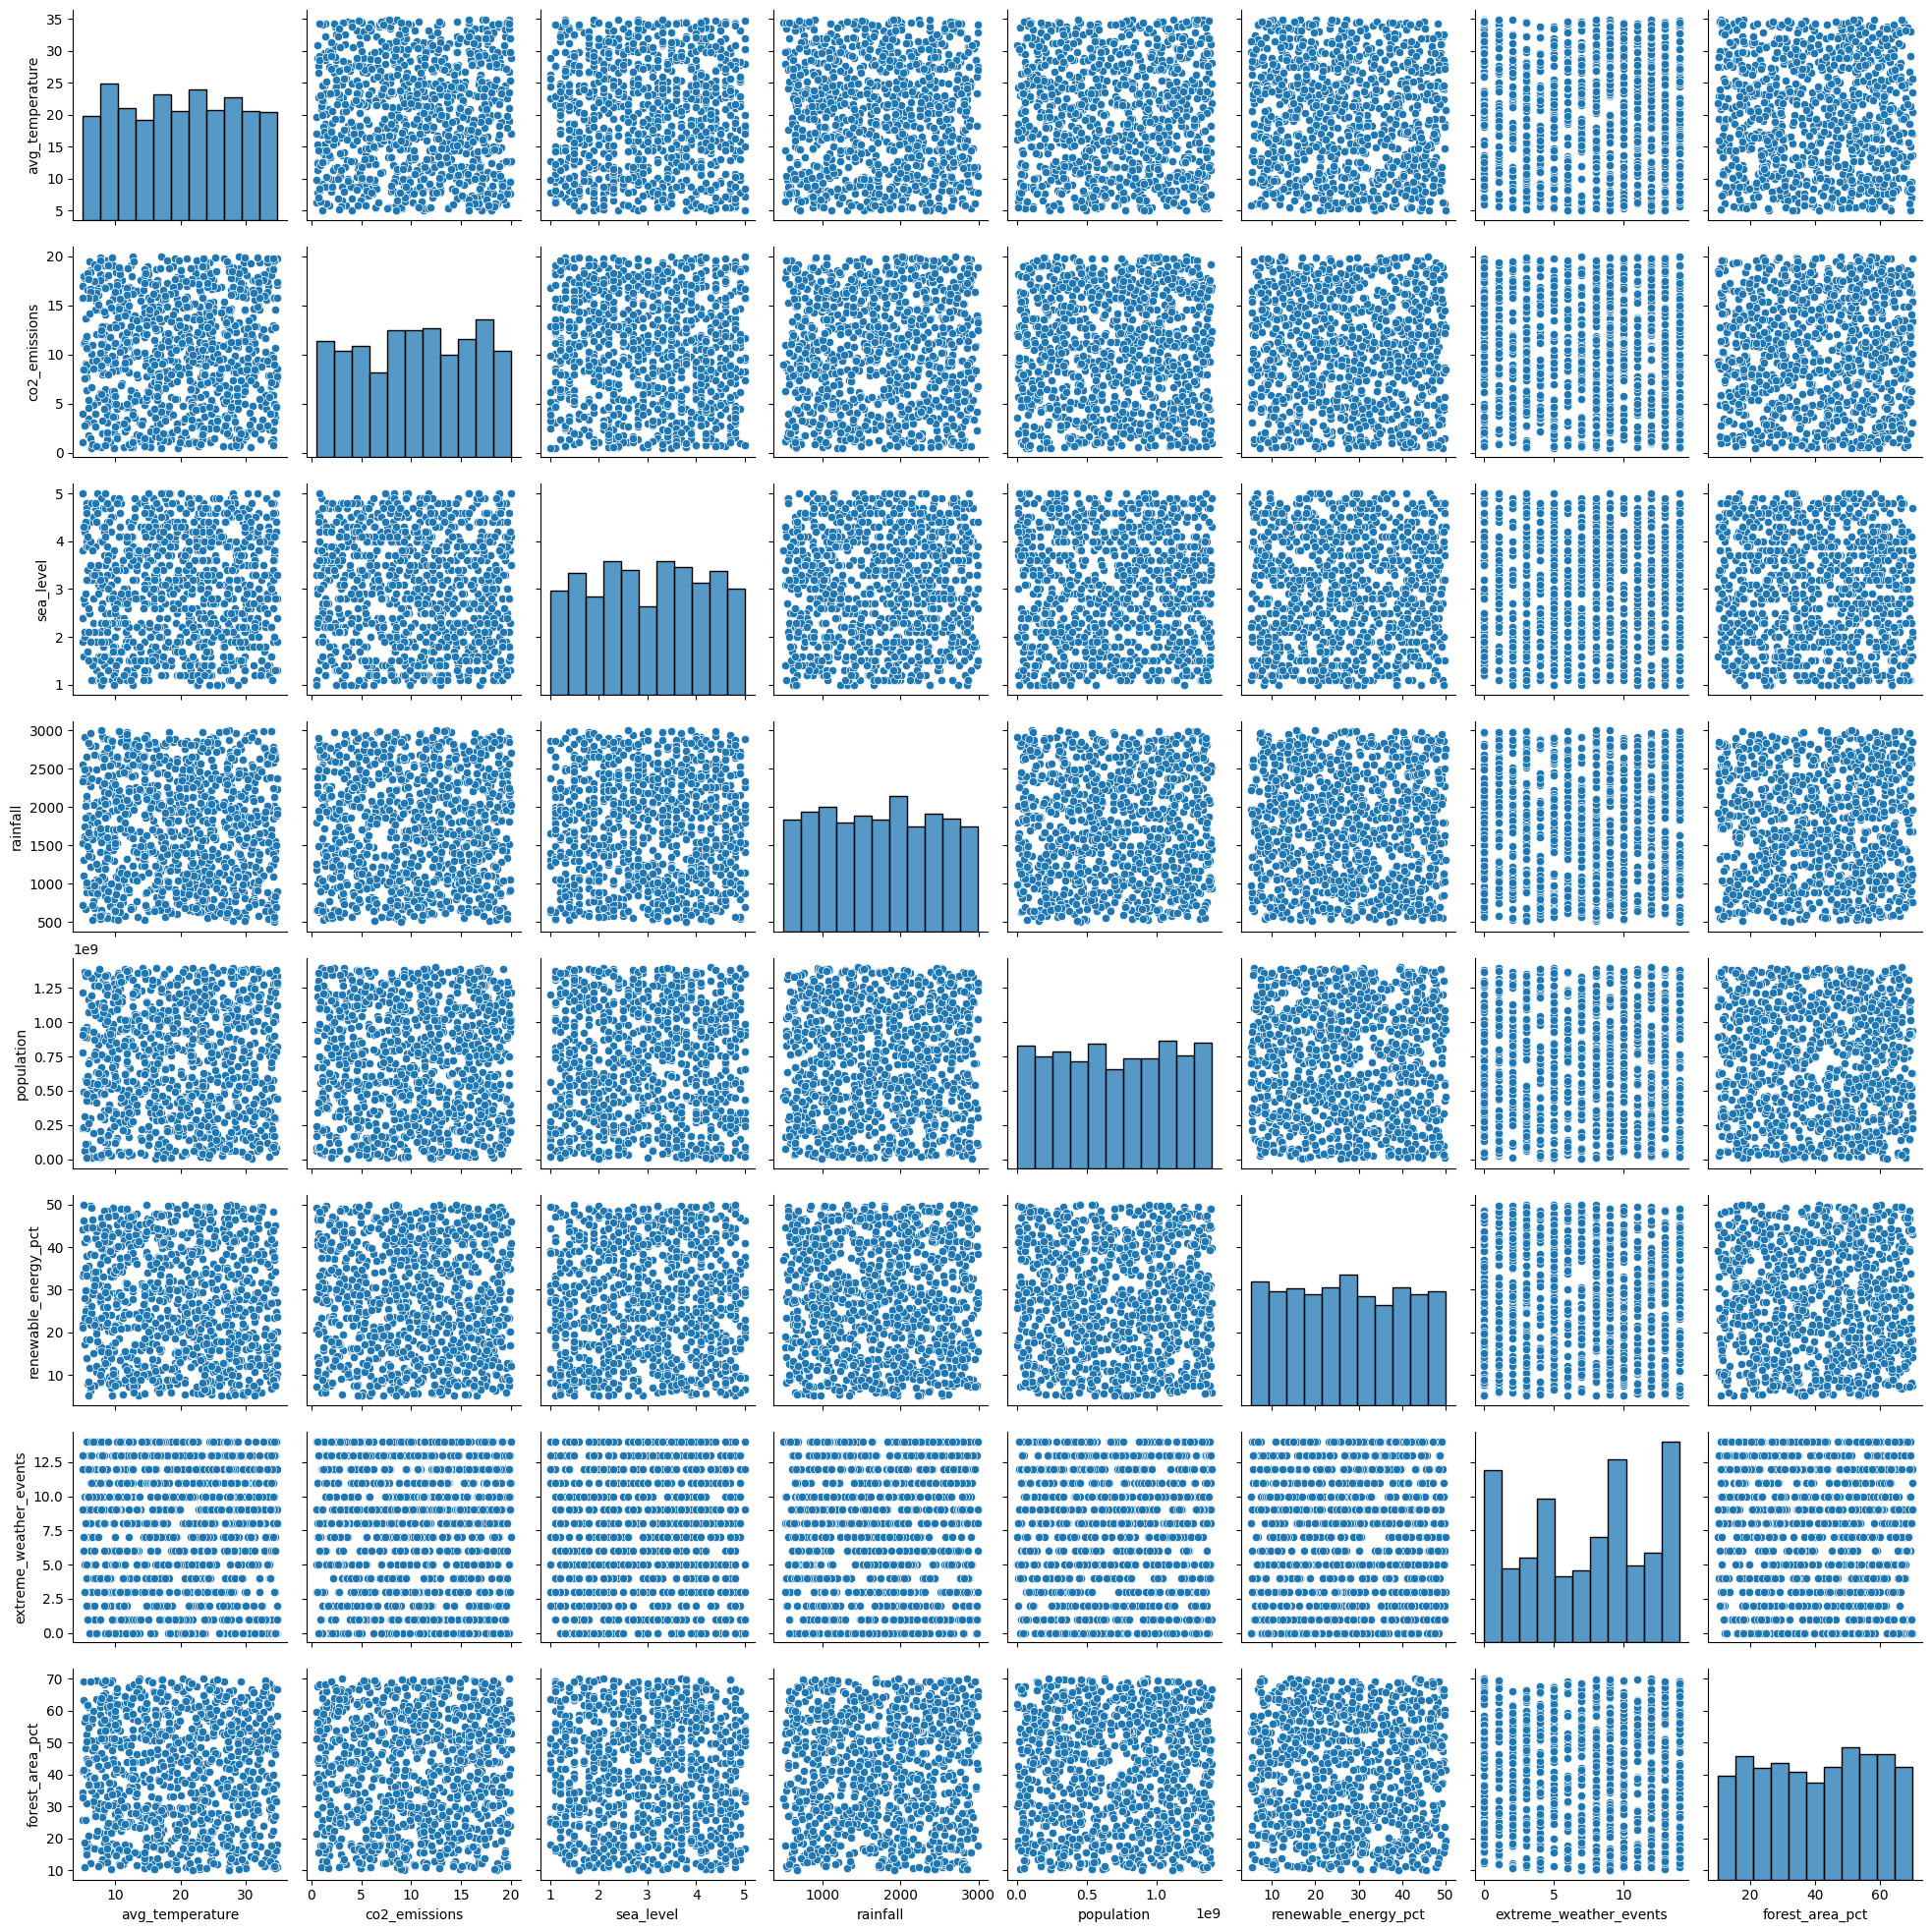

In [22]:
# Pairplot visualization of all variable relationships

sns.pairplot(df)
plt.savefig("../output/climate_variable_pairplot.png")
plt.show()


In [23]:
X = df.drop('avg_temperature', axis=1) # Defining feature variable
y = df['avg_temperature'] # Defining target variable            

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_test.to_csv("../data/test_set_X.csv", index=False) # Saving X_test as a csv file
y_test.to_csv("../data/test_set_y.csv", index=False) # Saving y_test as a csv file
X_train.to_csv("../data/train_set_X.csv", index=False) # Saving X_train as a csv file
y_train.to_csv("../data/train_set_y.csv", index=False) # Saving y_train as a csv file